In [1]:
import tensorflow as tf

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_data,x_test=x_train/255.0,x_test/255.0

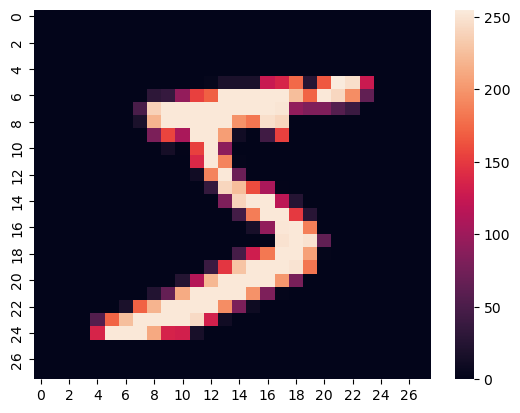

In [4]:
sns.heatmap(x_train[0])
plt.show()

In [5]:
model=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128,activation="relu"),
    Dropout(0.2),
    Dense(10)
])

In [6]:
predictions=model(x_train[:1]).numpy()
predictions

array([[ -42.475735, -193.27835 ,  104.03974 ,  -11.491653, -119.57275 ,
          -7.185214, -154.14737 ,  -51.47478 ,  109.86566 , -256.48996 ]],
      dtype=float32)

In [7]:
tf.nn.softmax(predictions).numpy()

array([[0.        , 0.        , 0.00294141, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.99705863, 0.        ]],
      dtype=float32)

In [8]:
loss_fn=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [9]:
model.compile(optimizer="adam",loss=loss_fn,metrics=['accuracy'])

In [10]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 2.6737 - accuracy: 0.7611
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5735 - accuracy: 0.8492
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4816 - accuracy: 0.8750
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4275 - accuracy: 0.8901
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4063 - accuracy: 0.8963


In [11]:
model.evaluate(x_test,y_test,verbose=2)

313/313 - 1s - loss: 2.5316 - accuracy: 0.0974 - 820ms/epoch - 3ms/step


[2.531555414199829, 0.09740000218153]

In [12]:
val=model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3788 - accuracy: 0.9044 - val_loss: 2.5900 - val_accuracy: 0.0974
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3680 - accuracy: 0.9088 - val_loss: 2.6231 - val_accuracy: 0.0974
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3502 - accuracy: 0.9138 - val_loss: 2.6543 - val_accuracy: 0.0974
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3462 - accuracy: 0.9148 - val_loss: 2.6685 - val_accuracy: 0.0974
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3331 - accuracy: 0.9185 - val_loss: 2.6854 - val_accuracy: 0.0974


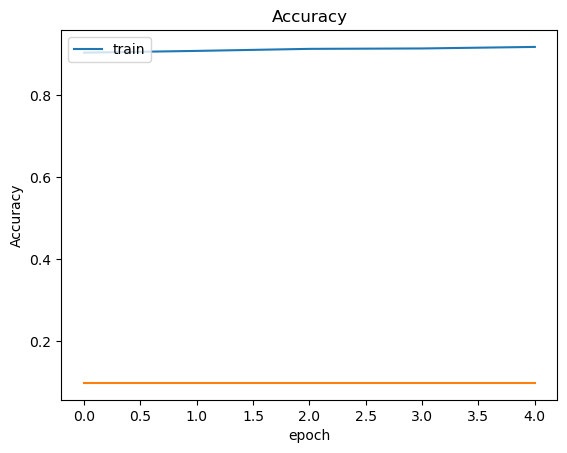

In [13]:
import matplotlib.pyplot as plt
plt.plot(val.history["accuracy"])
plt.plot(val.history["val_accuracy"])
plt.title('Accuracy')
plt.ylabel("Accuracy")
plt.xlabel("epoch")
plt.legend(["train"],loc='upper left')
plt.show()

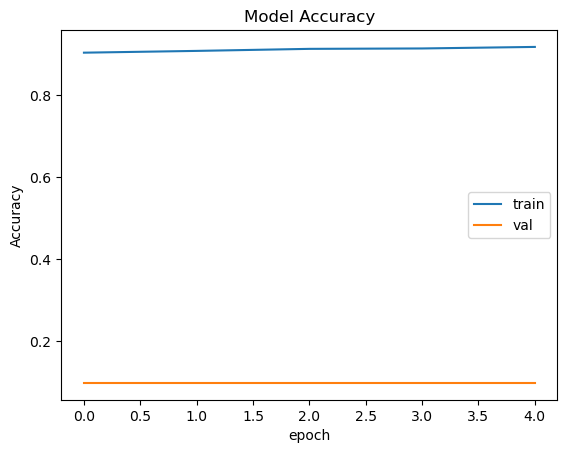

In [14]:
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epoch")
plt.plot(val.history["accuracy"])
plt.plot(val.history["val_accuracy"])
plt.legend(["train","val"])
plt.show()